<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/derivaci%C3%B3n_e_integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

misc derivative scipy
DAda una función $f(x)$
  
  Ej:$$f(x)=a\sin^2(x)+b\tan^2 (x)\\
  x=[x_{min},x_{max}]$$

  misc derivative $x=x_0$

In [ ]:
import scipy as sc
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [ ]:
#===============================================================================
# Datos Iniciales
#===============================================================================
eps = 0
xmin = -0.01 # -np.pi/2
xmax = 0.01 #np.pi/2
a, b = 1, 1

#===============================================================================
rango = [xmin, xmax]
intervalo = np.linspace(xmin+eps,xmax+eps,100,endpoint=False)
f = lambda x: a*(np.sin(x))**2+b*(np.tan(x))**2
Y = f(intervalo)
derivadas = sc.misc.derivative(f,Y)
def fp(x):
  return 2*a*np.sin(x)*np.cos(x)+2*b*np.tan(x)*((np.tan(x))**2+1)
#derivada

<ipython-input-2-40a21ddf380c>:14: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivadas = sc.misc.derivative(f,Y)


In [ ]:
_x = sy.symbols("x")
_a , _b = sy.symbols("a b")
sy.diff(_a*(sy.sin(_x))**2+_b*(sy.tan(_x))**2,_x)

2*a*sin(x)*cos(x) + b*(2*tan(x)**2 + 2)*tan(x)

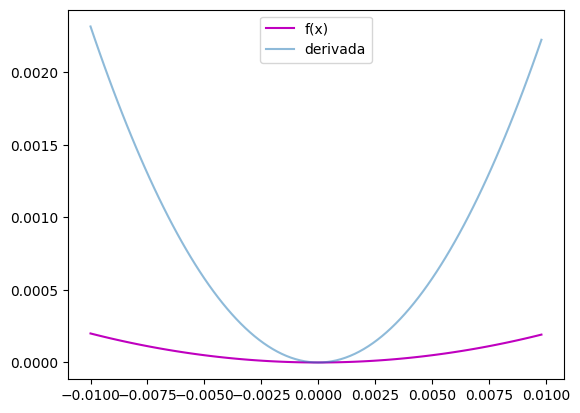

In [ ]:
plt.figure()
plt.plot(intervalo, Y,c="m")
plt.plot(intervalo, derivadas, alpha=0.5)
plt.legend(["f(x)","derivada"])
plt.show()

$$f'(x_0)=\frac 1 {2h}[f(x_0+h)-f(x_0-h)]-\frac{h^2}3f^{(3)}(ξ_0)\\
ξ_1\in [x_0-h,x_0+h]$$

In [ ]:
g = lambda x: x**2

In [ ]:
x0=6
derivada = lambda f, x0, h: (1/(2*h))*(f(x0+h)-f(x0-h))

In [ ]:
np.round?

In [ ]:
derivada(g,x0,1e-3)

12.000000000004007

In [ ]:
prueba = np.array([1,2,3])
h=-2/3
for i in range(len(prueba)):
  print(derivada(g,prueba[i],h))

1.9999999999999996
3.999999999999999
5.999999999999998


In [ ]:
#Derivada con rango
def derr(f,Y):
  l = len(Y)
  h=(Y[l-1]-Y[0])/l
  df = np.zeros(l)
  for i in range(l):
    df[i]=derivada(f,Y[i],h)
    #print(df)
  return df

In [ ]:
vale = np.linspace(0,4,3)
valef = lambda x: x**2
derr(valef,vale)

array([0., 4., 8.])

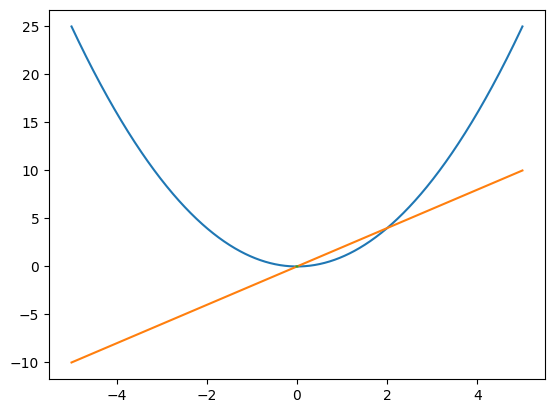

In [ ]:
xp = np.linspace(-5,5,1000)
teorica = lambda y: 2*y
plt.figure()
plt.plot(xp,g(xp))
plt.plot(xp,derr(g,xp))
#plt.plot(xp,teorica(xp)) # se comprueba que son iguales
plt.plot(intervalo,derivadas)
plt.show()

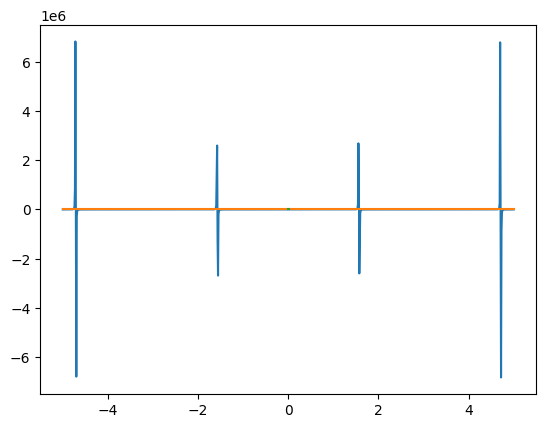

In [ ]:
xp = np.linspace(-5,5,1000)
teorica = lambda y: 2*y
plt.figure()
#plt.plot(xp,f(xp,a,b))
plt.plot(xp,derr(f,xp))
plt.plot(xp,teorica(xp)) # se comprueba que son iguales
plt.plot(intervalo,derivadas)
plt.show()

In [ ]:
#Este está horrible, corregir bien
# agregar a misc derivative un dx


# Integración
Trapecio
$$\frac{b-a}2[f(a)+f(b)]\\
\frac h 2(f(x_0)+2\sum_i^{n-1} f(x_i)+f(x_n))\\
\\
a\in [min,max), b\in (min,max]\\
x_0 = min\\
x_n B= max $$

In [ ]:
# Funciones
f = lambda x: 2 * x
intf = lambda x: x**2

# Valores
min = 0
max = 3
n = 100

b = np.linspace(max,min,n,endpoint=False)[::-1]
a = np.linspace(min,max,n, endpoint=False)


In [ ]:
Area = ((b-a)*1/2)*(f(a)+f(b))
Area = abs(Area.sum())
Area

9.000000000000032

In [ ]:
print("Primer área",(1-0)*(f(0)+f(1))/2)
print("Segunda área", (2-1)*(f(1)+f(2))/2)
print("Tercer área", (3-2)*(f(2)+f(3))/2)
print("Área total", 1+3+5)

Primer área 1.0
Segunda área 3.0
Tercer área 5.0
Área total 9


In [ ]:
def area1(f,rango,n):
  min = rango.min()
  max = rango.max()
  a = np.linspace(min,max,n, endpoint=False)
  b = np.linspace(max,min,n,endpoint=False)[::-1]
  res = ((b-a)*1/2)*(f(a)+f(b))
  return abs(res).sum()

In [ ]:
rango = np.array([0,3])
area1(f,rango,n)
#probar hacer con lo delta

9.000000000000032

In [ ]:
np.arange(3,1,-1e-2)

array([3.  , 2.99, 2.98, 2.97, 2.96, 2.95, 2.94, 2.93, 2.92, 2.91, 2.9 ,
       2.89, 2.88, 2.87, 2.86, 2.85, 2.84, 2.83, 2.82, 2.81, 2.8 , 2.79,
       2.78, 2.77, 2.76, 2.75, 2.74, 2.73, 2.72, 2.71, 2.7 , 2.69, 2.68,
       2.67, 2.66, 2.65, 2.64, 2.63, 2.62, 2.61, 2.6 , 2.59, 2.58, 2.57,
       2.56, 2.55, 2.54, 2.53, 2.52, 2.51, 2.5 , 2.49, 2.48, 2.47, 2.46,
       2.45, 2.44, 2.43, 2.42, 2.41, 2.4 , 2.39, 2.38, 2.37, 2.36, 2.35,
       2.34, 2.33, 2.32, 2.31, 2.3 , 2.29, 2.28, 2.27, 2.26, 2.25, 2.24,
       2.23, 2.22, 2.21, 2.2 , 2.19, 2.18, 2.17, 2.16, 2.15, 2.14, 2.13,
       2.12, 2.11, 2.1 , 2.09, 2.08, 2.07, 2.06, 2.05, 2.04, 2.03, 2.02,
       2.01, 2.  , 1.99, 1.98, 1.97, 1.96, 1.95, 1.94, 1.93, 1.92, 1.91,
       1.9 , 1.89, 1.88, 1.87, 1.86, 1.85, 1.84, 1.83, 1.82, 1.81, 1.8 ,
       1.79, 1.78, 1.77, 1.76, 1.75, 1.74, 1.73, 1.72, 1.71, 1.7 , 1.69,
       1.68, 1.67, 1.66, 1.65, 1.64, 1.63, 1.62, 1.61, 1.6 , 1.59, 1.58,
       1.57, 1.56, 1.55, 1.54, 1.53, 1.52, 1.51, 1.

In [ ]:
def integral1(f,rango):
  min = rango.min()
  max = rango.max()
  eps = 1e-7
  a = np.arange(min,max,eps)
  b = np.arange(max,min,-eps)[::-1]
  res = ((b-a)*1/2)*(f(a)+f(b))
  #print(len(res))
  return abs(res.sum())

In [ ]:
integral1(f,rango)

9.147292106904338

In [ ]:
area1(lambda x: np.cos(x),np.array([0,np.pi/2]),1000)

0.9999997943831724

In [ ]:
def area(f,rango):
  min = rango.min()
  max = rango.max()
  eps = 1e-8
  med = np.arange(min+eps,max,eps)
  res = (eps/2)*(f(min)+2*f(med).sum()+f(max))
  return res

In [ ]:
intr = 9

In [ ]:
error0 = abs(area(f,rango)-intr)
error1 =  abs(area1(f,rango,1)-intr)
#Curiosamente con esta función mientras menor n mayor precisión
error2 = abs(integral1(f,rango)-intr)
display(Latex("$$f(x)=x$$"))
print("Método sumatoria: ",error0)
print("Trapecio n especifico (n=1000): ",error1)
print("Trapecio eps: ",error2)

<IPython.core.display.Latex object>

Método sumatoria:  3.552713678800501e-15
Trapecio n especifico (n=1000):  0.0
Trapecio eps:  0.14729210690433803


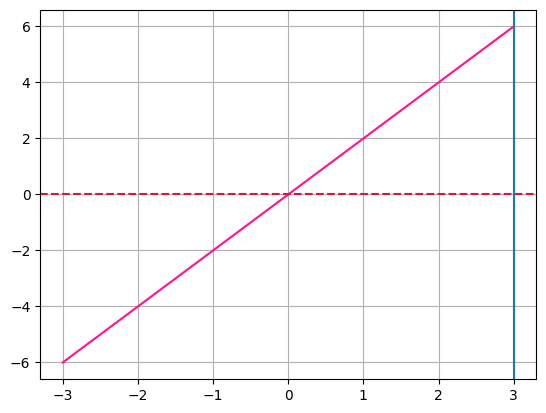

In [ ]:
intervalo = np.array([-3,3])
fig, ax = plt.subplots()
ax.plot(intervalo,f(intervalo),c="deeppink")
ax.fill(intervalo,f(intervalo),c="pink")
ax.axhline(0, color = "crimson", linestyle = "--")
ax.axvline(3)
ax.grid()
plt.show()

In [ ]:
sc.integrate.quad(g,rango.min(),rango.max())

(9.000000000000002, 9.992007221626411e-14)

In [ ]:
rango = np.array([-1,1])
g = lambda x: np.sin(x)
intr = sc.integrate.quad(g,rango.min(),rango.max())
error0 = abs(area(g,rango)-intr)
error1 =  abs(area1(g,rango,1000)-intr)
#Curiosamente con esta función mientras menor n mayor precisión
error2 = abs(integral1(g,rango)-intr)
display(Latex("$$g(x)=\sin x$$"))
print("Método sumatoria: ",error0[0])
print("Trapecio n especifico (n=1000): ",error1[0])
print("Trapecio eps: ",error2[0])
print("Con esta función podemos ver mejor las diferencias entre las funciones")
#print("Hay 2 valores, ta que la integral de scypy me regresa el error.")

<IPython.core.display.Latex object>

Método sumatoria:  8.456378871776452e-09
Trapecio n especifico (n=1000):  0.9193950817985526
Trapecio eps:  7.589415207398531e-17
Con esta función podemos ver mejor las diferencias entre las funciones


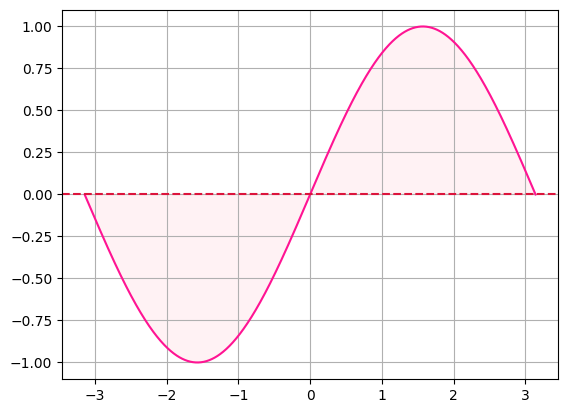

In [ ]:
n=1000
intervalo = np.linspace(-np.pi,np.pi,n)
cero = np.zeros(len(intervalo))
fig, ax = plt.subplots()
ax.plot(intervalo,g(intervalo),c="deeppink")
ax.fill(intervalo,g(intervalo),alpha=0.2,c="pink")
ax.axhline(0, color = "crimson", linestyle = "--")
ax.grid()